In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py


# Read in bus transit data
bus_ridership = pd.read_csv('/content/CTA_-_Ridership_-_Bus_Routes_-_Daily_Totals_by_Route.csv')


In [20]:
# Print first 5 rows to check
print(bus_ridership.head())
print(bus_ridership.info())

  route        date daytype  rides
0     3  01/01/2001       U   7354
1     4  01/01/2001       U   9288
2     6  01/01/2001       U   6048
3     8  01/01/2001       U   6309
4     9  01/01/2001       U  11207
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952781 entries, 0 to 952780
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   route    952781 non-null  object
 1   date     952781 non-null  object
 2   daytype  952781 non-null  object
 3   rides    952781 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 29.1+ MB
None


In [21]:
# Set date column to datetime type
bus_ridership['date'] = pd.to_datetime(bus_ridership['date'])
print(bus_ridership.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952781 entries, 0 to 952780
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   route    952781 non-null  object        
 1   date     952781 non-null  datetime64[ns]
 2   daytype  952781 non-null  object        
 3   rides    952781 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 29.1+ MB
None


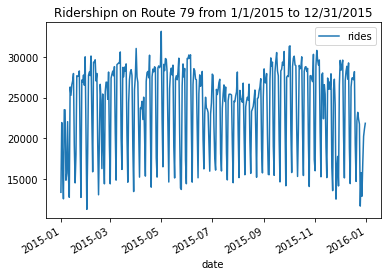

In [5]:
# Plot of route 79 data to get idea about route data shape
route79 = bus_ridership[bus_ridership['route'] == '79']

route79_2015 = route79.loc[(route79['date'] >= '01/01/2015')
                     & (route79['date'] < '01/01/2016')]

route79_2015.plot(x = 'date', y = 'rides', title = 'Ridershipn on Route 79 from 1/1/2015 to 12/31/2015')

In [28]:
# Subset bus ridership dataset between years 2012 and 2019 and save new dataframe to csv file
bus_ridership_2012_2019 = bus_ridership.loc[(bus_ridership['date'] >= '01/01/2012')
                     & (bus_ridership['date'] < '01/01/2020')]
(bus_ridership_2012_2019.head())

bus_ridership_2012_2019.to_csv('CTA_Ridership_2012_2019.csv', header=True, index=False)

In [8]:
# Find most popular (on average) route by grouping by route number, finding the mean, and sorting by descending value
mean_ridership = bus_ridership_2015_2019.groupby(['route'])['rides'].mean().sort_values(ascending = False)
print(mean_ridership)


route
79     21837.883899
66     19116.819825
9      18071.892114
8      17568.822015
77     17523.733844
           ...     
165      139.221350
X98       15.612084
154        8.000000
999        1.500000
992        1.000000
Name: rides, Length: 136, dtype: float64


In [25]:
test = pd.read_csv('/content/CTA_Ridership_2012_2019.csv')

print(test.head())

  route        date daytype  rides
0   108  2015-01-08       W    697
1   63W  2015-01-26       W   1340
2   169  2015-01-20       W    298
3    56  2015-01-16       W  10312
4   111  2015-01-22       W   4381
